# Mushroom Classification
Classification of mushrooms as edible or poisonouns is an important problem for many poeple. The classification process can be done using different mushrooms features. This notebook is intended to solve this problem using machine learning algorithms that can predict the class of each mushroom (edible or poisonous) from its features. The dataset used for this project is: [UCI Machine Learning Repository: Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom).

![title](mushrooms.jpg)

## Steps for completing this project:
1. [Data Analysis](#analysis).
2. [Data Preprocessing](#preprocessing).
3. [Splitting The Dataset](#splitting). 
4. [Building The Benchmark Model](#benchmark).
5. [Building Different Machine Learning Models](#models).
6. [Evaluation](#evaluation).
7. [Validation](#validation).

## 1. Data Analysis <a name="analysis"></a>

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from time import time
from matplotlib import pyplot as plt
from IPython.display import display

%matplotlib inline
sns.set()

In [2]:
print("seaborn vesion: ", sns.__version__)

seaborn vesion:  0.9.0


### Importing Dataset

In [3]:
try:
    raw_dataset = pd.read_csv('mushrooms.csv')
    # Display all the columns of the dataset
    display(raw_dataset.iloc[:5, :12])
    display(raw_dataset.iloc[:5, 12:])
except:
    print("Couldn't load the dataset.")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,p,x,s,n,t,p,f,c,n,k,e,e
1,e,x,s,y,t,a,f,c,b,k,e,c
2,e,b,s,w,t,l,f,c,b,n,e,c
3,p,x,y,w,t,p,f,c,n,n,e,e
4,e,x,s,g,f,n,f,w,b,k,t,e


,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,s,s,w,w,p,w,o,p,k,s,u
1,s,s,w,w,p,w,o,p,n,n,g
2,s,s,w,w,p,w,o,p,n,n,m
3,s,s,w,w,p,w,o,p,k,s,u
4,s,s,w,w,p,w,o,e,n,a,g


To know more about the dataset.

In [4]:
print("The 'Mushrooms Dataset' has {} rows and {} columns.\n".format(raw_dataset.shape[0], raw_dataset.shape[1]))
raw_dataset.info()

The 'Mushrooms Dataset' has 8124 rows and 23 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-

**Some Statistics**:

The dataset contains 8124 rows and 23 columns. We can see that it doesn't contain missing values that need to be filled (all columns contain 8124 rows), but later we will find some missing values filled with a special character (as mentioned in the original source of the dataset).

All the columns hold categorical values, thus, we need to know each columns unique values and to find the frequency table for the data.

In [5]:
raw_dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Understanding The Values of Each Column:**

We can refer to the original data source information:

**Attribute Information:**
1. **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s 
3. **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. **bruises**: bruises=t,no=f 
5. **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. **gill-attachment**: attached=a,descending=d,free=f,notched=n 
7. **gill-spacing**: close=c,crowded=w,distant=d 
8. **gill-size**: broad=b,narrow=n 
9. **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. **stalk-shape**: enlarging=e,tapering=t 
11. **stalk-root**: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s 
13. **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s 
14. **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. **veil-type**: partial=p,universal=u 
17. **veil-color**: brown=n,orange=o,white=w,yellow=y 
18. **ring-number**: none=n,one=o,two=t 
19. **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. **population**: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. **habitat**: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

As a part of data exploration, we will find each variable (column) distribution, and we will find its unique values

**Unique Values of Each Column:**

In [6]:
unique = lambda df :  [(colName, df[colName].unique().tolist()) for colName in df.columns] # tolist() to convert numpy array into list
display(unique(raw_dataset))

[('class', ['p', 'e']),
 ('cap-shape', ['x', 'b', 's', 'f', 'k', 'c']),
 ('cap-surface', ['s', 'y', 'f', 'g']),
 ('cap-color', ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']),
 ('bruises', ['t', 'f']),
 ('odor', ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']),
 ('gill-attachment', ['f', 'a']),
 ('gill-spacing', ['c', 'w']),
 ('gill-size', ['n', 'b']),
 ('gill-color', ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']),
 ('stalk-shape', ['e', 't']),
 ('stalk-root', ['e', 'c', 'b', 'r', '?']),
 ('stalk-surface-above-ring', ['s', 'f', 'k', 'y']),
 ('stalk-surface-below-ring', ['s', 'f', 'y', 'k']),
 ('stalk-color-above-ring', ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']),
 ('stalk-color-below-ring', ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']),
 ('veil-type', ['p']),
 ('veil-color', ['w', 'n', 'o', 'y']),
 ('ring-number', ['o', 't', 'n']),
 ('ring-type', ['p', 'e', 'l', 'f', 'n']),
 ('spore-print-color', ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']),
 ('population', ['s',

Some observations:
- There is a strange value in **'stalk-root'** column, which is **'?'**. Back to the original source of the dataset, we can see that '?' represents missing values. This will be discussed after taking a look at data distribution.
- **'veil-type'** column has only **one value** which means that this column doesn't affect the class of the mushrooms as it is the same in all observations hence it will be removed from the dataset.

***We will deal with these situations in the data preprocessing section.***

**Data Distribution** (for each column):

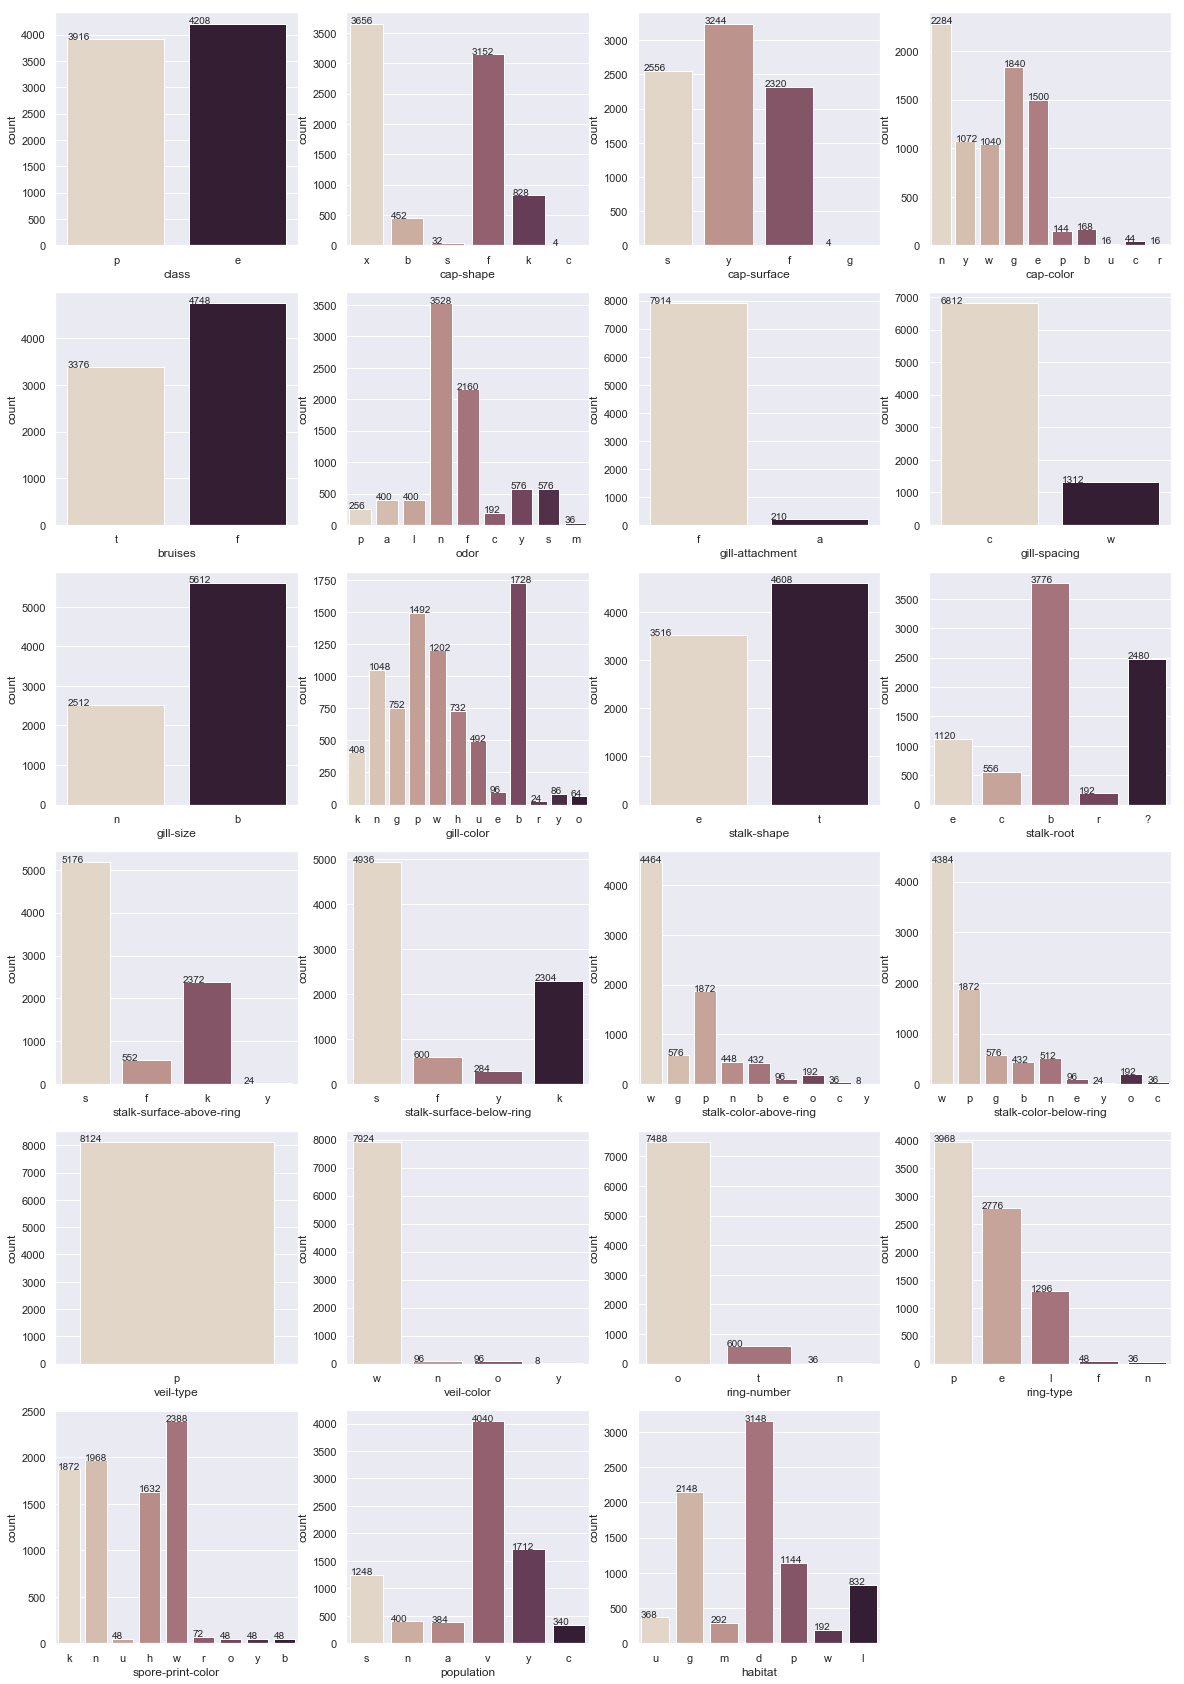

In [7]:
fig, axes = plt.subplots(6, 4, figsize=(20, 30))
axes = axes.flatten()
for i, col in enumerate(raw_dataset.columns):
    axis = sns.countplot(data=raw_dataset, x=col, palette='ch:.25', ax=axes[i])
    for p in axis.patches:
        height = p.get_height()
        axis.text(p.get_x(), height+ 3, '%.0f'%(height))
        
fig.delaxes(axes[raw_dataset.shape[1]]) # delete last unnecessary plot.


**From the above plots we can see the following:**
- The **'class'** variable plot shows that both classes are balanced (edible and poisonous). With 3916 rows classified as poisonous and 4208 as edible, we can ensure that there is enough data for the machine learning model for not being biased.
- Some variable like **'gill-attachment'** and **'veil-color'** has a huge difference between the variables counts, some values have small count values. This may raise a question if mushrooms with these features are rare, or hard to get, or they are not found frequently. These questions may (or may not) contribute to the class of a given mushroom directly, and we can find that by applying machine learning algorithm to determine if this rare features are important in the class decision.
- The plot made it easier to notice the only one value of  **'veil-type'**, as we mentioned earlier.
- The **'stalk-root'** missing values denoted as **'?'** are occupying a big portion of the variable (2480/8124 * 100 = 30.53% approx.).
- Other variables have different distributions, we need find the relationship between each variable and the **'class'** column, and this is will be our next step.

**Finding The Direct Relationship Between Each Variable And The Target Variable:**

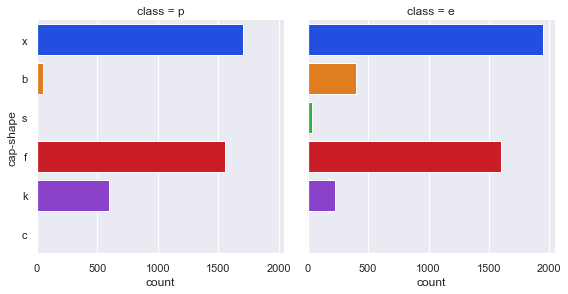

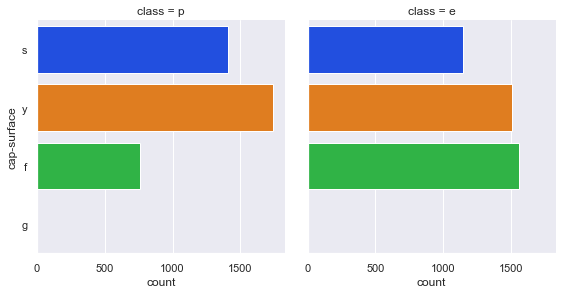

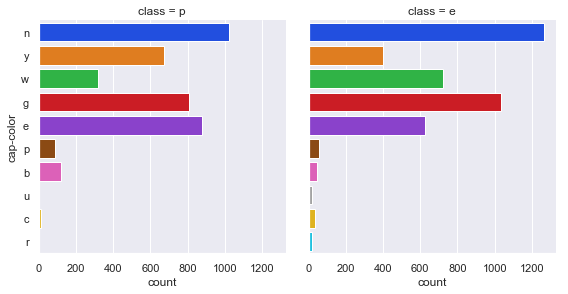

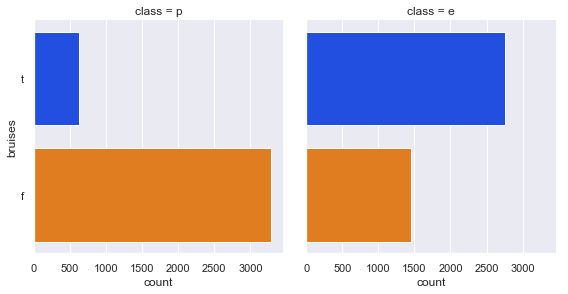

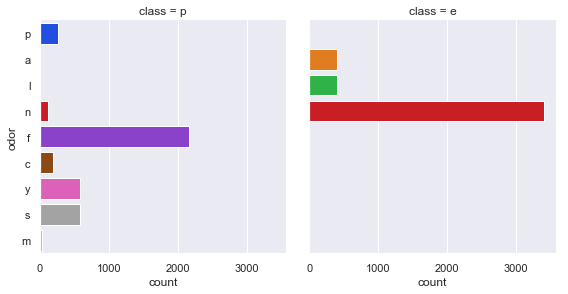

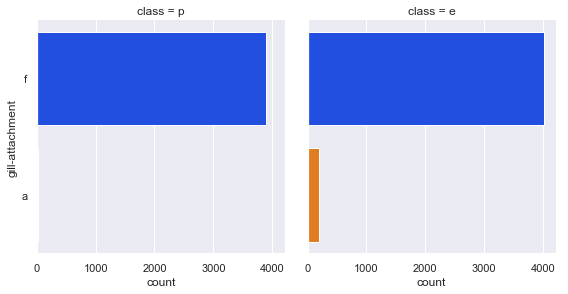

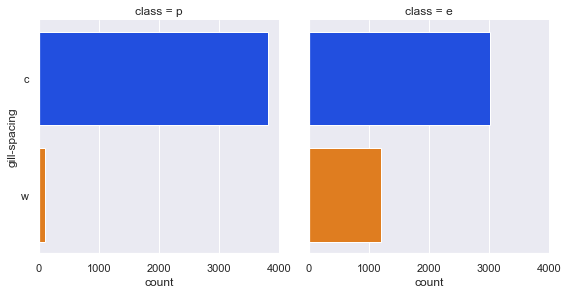

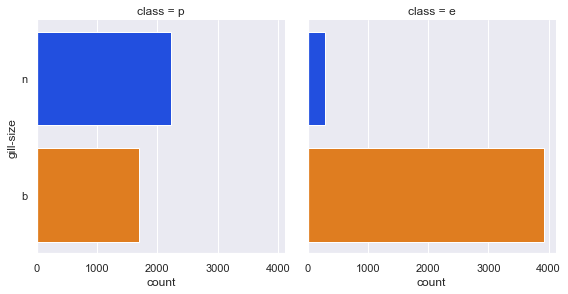

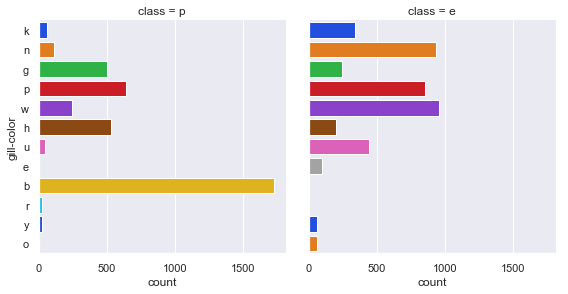

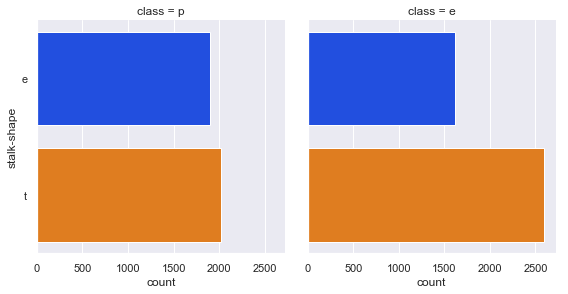

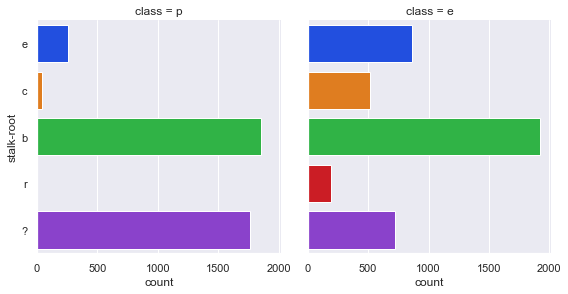

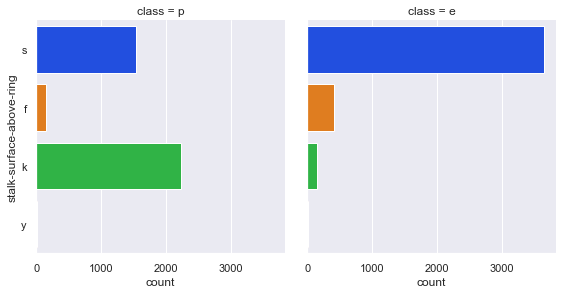

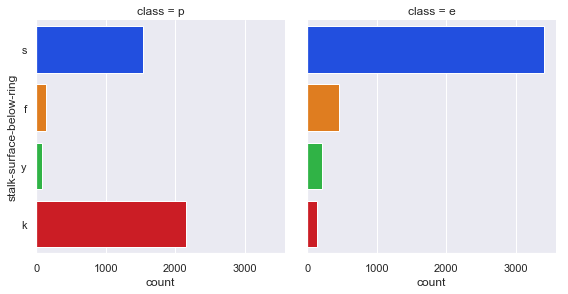

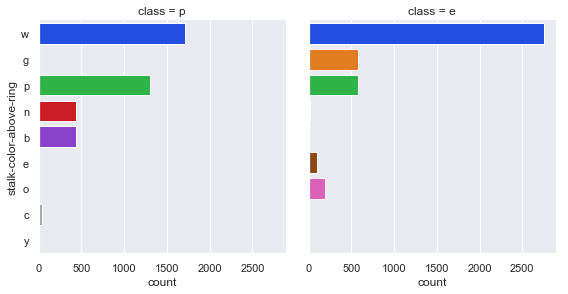

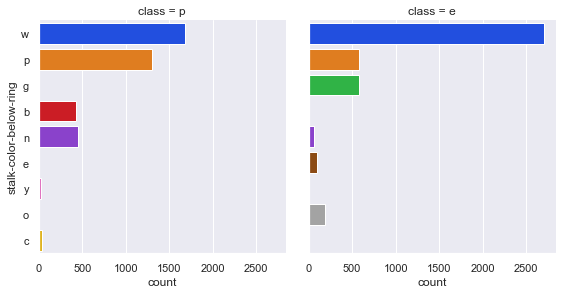

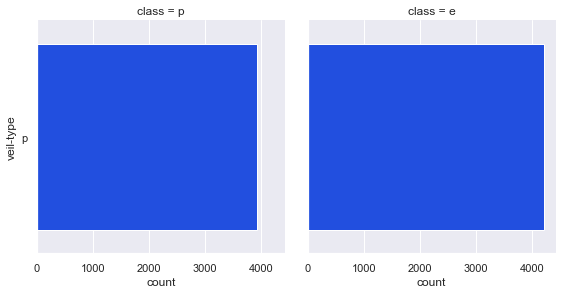

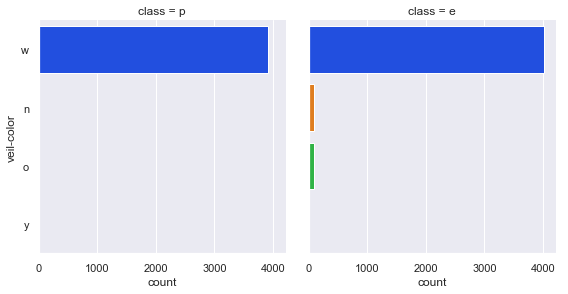

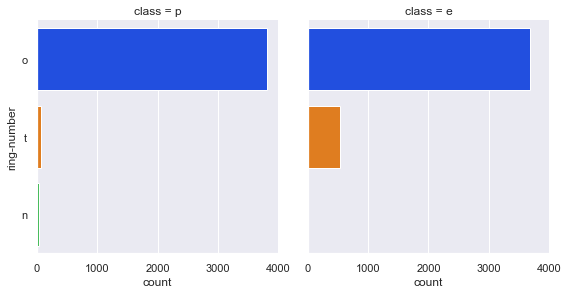

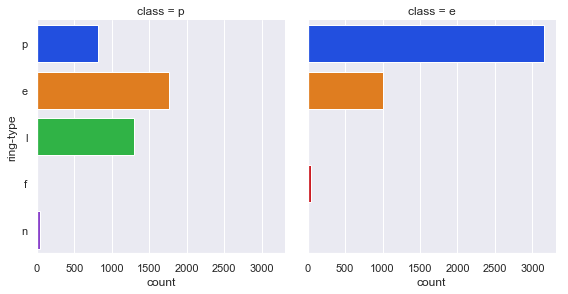

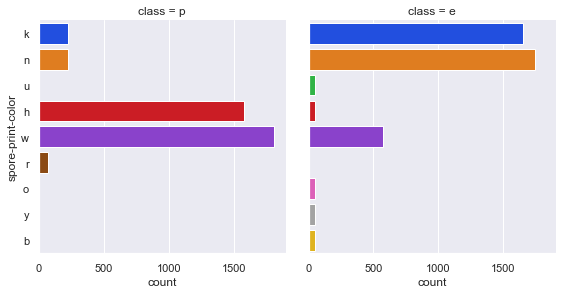

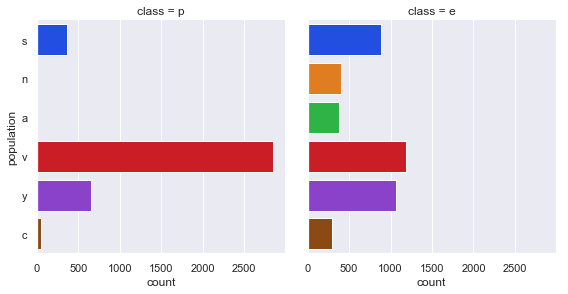

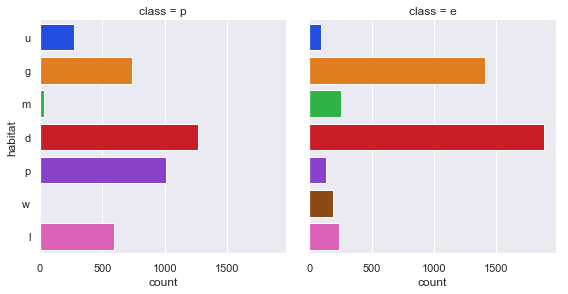

In [8]:
plt.rcParams.update({'figure.max_open_warning': 0})

# to display the relationship between a col and the class
for col in raw_dataset.columns[1:]:
    sns.catplot(y=col, kind="count", col="class", palette="bright", data=raw_dataset, height=4, aspect=3 / 3)
    

**Some Important Observations:**
- **'bruises'** has two values: t: true (has bruises) and f: false. The probability of a mushroom to be edible increases if the 'bruises' value is 't', it relates somehow to the mushroom class. 
- **'odor'** variable has a strong relationship with the target variable, because most of its values relates to one class. For example: (p, f, c, y, s, m) 'odor' values are only seen in the poisonous mushrooms! and (a, l) are seen only in edible ones. The only common value is n(none), which is obvious that in most of the time it belongs to the edible class.
- The 'b' (buff) value of the **'gill-color'** is always classified as poisonouns.
- **'spore-print-color'** will be an important varable in our model, as the 'odor' variable.

**Visualizing 'spore-print-color' With Actual Colors:**

[Text(0,0,'black'),
 Text(0,0,'brown'),
 Text(0,0,'purple'),
 Text(0,0,'white'),
 Text(0,0,'chocolate'),
 Text(0,0,'green'),
 Text(0,0,'orange'),
 Text(0,0,'yellow'),
 Text(0,0,'buff')]

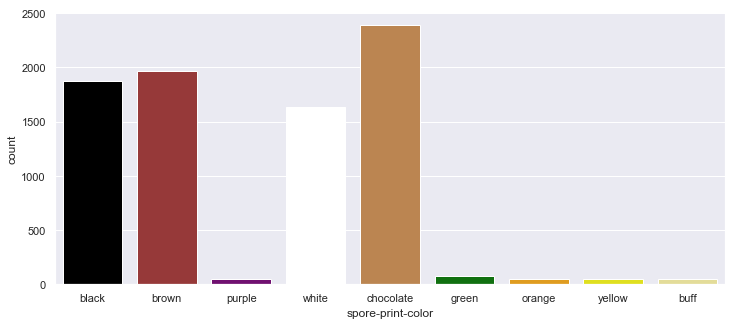

In [9]:
sns.set(style="darkgrid") 
fig, axes = plt.subplots(figsize=(12, 5))
colors = ['black', 'brown', 'purple', 'white', 'peru', 'green', 'orange', 'yellow', 'khaki']
ax = sns.countplot(x="spore-print-color", data=raw_dataset, palette=colors )
ax.set_xticklabels(labels=[ 'black', 'brown', 'purple', 'white', 'chocolate', 'green', 'orange', 'yellow', 'buff'], fontdict=None, minor=False)

## 2. Data Preprocessing <a name="preprocessing"></a>

***The 'class' column is our target variable, we will seperate it in another variable.***

Also, we will remove 'veil-type' column because it doesn't affect the class value:

In [10]:
raw_target = raw_dataset['class']
dataset = raw_dataset.drop(['veil-type', 'class'], axis=1)

# some statistics
print("Dataframe columns after removing 'class' and 'veil-type':\n", dataset.columns.tolist())

# Since all the dataframe columns are categorical, 
# dataset.describe() will find unique values and the frequency of top repeated value in each columns
dataset.describe()

Dataframe columns after removing 'class' and 'veil-type':
 ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,4,9,9,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,s,w,w,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


**Counting 'stalk-root' missing values:**

In [11]:
dataset['stalk-root'].value_counts()

print("{} data points have missing values of 'stalk-root' with percentage of {:05.2f}% of the total data points."\
     .format(2480, 2480/8124 *100)) 

2480 data points have missing values of 'stalk-root' with percentage of 30.53% of the total data points.


The number of missing values in this column is very large, I will leave the column as it is, and if the end results are not satisfying I will change the method of dealing with this column.

**Converting The Target Variables Values Into Binary Values:**

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder_class = LabelEncoder()
target = label_encoder_class.fit_transform(raw_target)
print(raw_target[:5].values)
print(target[:5])

['p' 'e' 'e' 'p' 'e']
[1 0 0 1 0]


The poisonous value is now denoted by '1', and edible by '0'

**Using One-Hot-Encoding For The Features:**

In [13]:
dataset = pd.get_dummies(dataset, drop_first=True) # to avoid dummy variable trap
print("No. of encoded columns: ", dataset.shape[1])
dataset.head()

No. of encoded columns:  95


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 3. Splitting The Dataset <a name="splitting"></a>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=0)

## 4. Building The Benchmark Model <a name="benchmark"></a>

In [15]:
def train(model, X_train, y_train):
    '''
    This functions trains the given model
    on the training varaiables.
    '''
    results = {}
    start = time() 
    model = model.fit(X_train, y_train)
    end = time() 
    
    results['train_time'] = end - start

    print("{} trained succesfully.".format(model.__class__.__name__))
    return results

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = {}

LR_model = LogisticRegression()
model_name = LR_model.__class__.__name__
results[model_name] = {}
results[model_name] = train(LR_model, X_train, y_train)

LogisticRegression trained succesfully.


## 5. Building The Models <a name="models"></a>

Machine learning models that will be used for this problem:
- Naive Bayes.
- Random Forest.
- Support Vectors Classifier.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

NB_model = GaussianNB()
RF_model = RandomForestClassifier(random_state=42)
SVM_model = SVC(random_state=42)

for model in [NB_model, RF_model, SVM_model]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = train(model, X_train, y_train)
    

GaussianNB trained succesfully.
RandomForestClassifier trained succesfully.
SVC trained succesfully.


## 6. Evaluation <a name="evaluation"></a>

In [48]:
def predict(trained_model, X_train, X_test, y_train, y_test):

    results = {}
    
    start = time() 
    y_pred_test = trained_model.predict(X_test)
    y_pred_train = trained_model.predict(X_train)
    end = time() 
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train, y_pred_train)
    results['acc_test'] = accuracy_score(y_test, y_pred_test)
    results['f_train'] = f1_score(y_pred_train, y_train)
    results['f_test'] = f1_score(y_pred_test, y_test)
    results['recall_train'] = recall_score(y_pred_train, y_train)
    results['recall_test'] = recall_score(y_pred_test, y_test)
    results['precision_train'] = precision_score(y_pred_train, y_train)
    results['precision_test'] = precision_score(y_pred_test, y_test)
            
    print("{} evaluation metrics have been recorded succesfully.".format(model.__class__.__name__))

    conf = confusion_matrix(y_test, y_pred_test)
    return results, conf
    

In [49]:
# a dict to store each model confusion matrix
models_confusion_matrices = {}
for model in [NB_model, RF_model, SVM_model, LR_model]:
    model_name = model.__class__.__name__
    res, conf = predict(model, X_train, X_test, y_train, y_test)
    results[model_name].update(res)
    models_confusion_matrices[model_name] = conf

GaussianNB evaluation metrics have been recorded succesfully.
RandomForestClassifier evaluation metrics have been recorded succesfully.
SVC evaluation metrics have been recorded succesfully.
LogisticRegression evaluation metrics have been recorded succesfully.


**Now We Have All The Needed Information To Make A Decision About The Best Classifier.**

As mentioned in the project report, our main evaluation metrics will be the accuracy and false negative count (considering poisonous as positive and edible as negative). False negative means that a mushroom is poisonous but our model classified it as edible, which is the worst case in our scenario. Also, the higher the testing accuracy rate, the more we can trust our model. Recall, precision, f1 score are also recorded.

In [50]:
# display(results)
results_df = pd.DataFrame(results)
transposed_results = results_df
results_df = results_df.T
display(results_df)

,acc_test,acc_train,f_test,f_train,precision_test,precision_train,pred_time,recall_test,recall_train,train_time
LogisticRegression,0.999590,0.999824,0.999571,0.999818,0.999142,0.999636,0.015623,1.000000,1.000000,0.139791
GaussianNB,0.946267,0.945304,0.946770,0.946444,0.999142,0.999273,0.066957,0.899614,0.898921,0.026985
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.015990,1.000000,1.000000,0.055963
SVC,0.997539,0.997010,0.997420,0.996900,0.994854,0.993818,0.654970,1.000000,1.000000,0.728548


**The Interpretation of Results:**

The above table shows that 'RandomForestClassifier' is the best model. It has an accuracy of 100% at training and testing and 100% in all other metrices. In terms of time, it was the second best scoring model in training and predicting time. Interestingly, the 'LogisticRegression' model scored very well, in fact, except for 'RandomForestClassifier', it beated all other models with 99.98% training accuracy and 99.95% testing accuracy, and it the least time consuming model in prediction.'GaussianNB' was the least scoring model with about 94.5% training accuracy and 94.6% testing accuracy, and it has the shortest training time. 'SVC' has the longest training and predicting time with about 99.7% training and testing accuracies. As the results are satisfying, the strategy of dealing with missing values will remain the same.

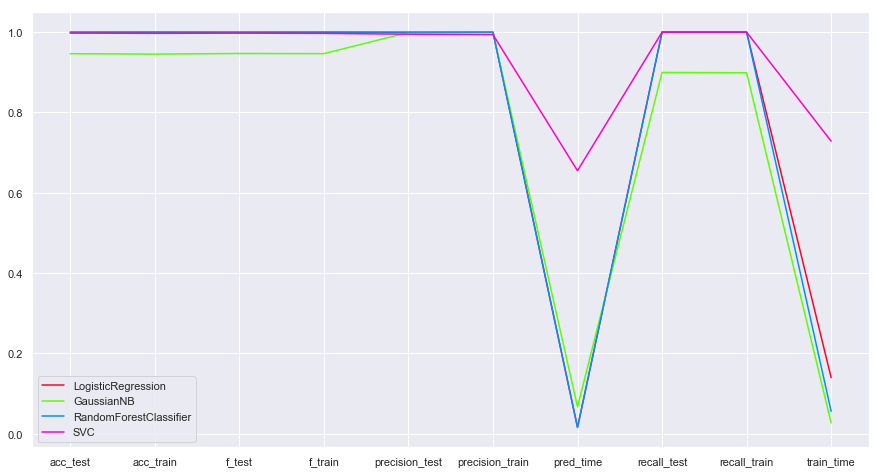

In [51]:
# plotting the results
rev_res = transposed_results.reset_index()
rev_res = rev_res.rename(columns={"index":"metric"})
ax = rev_res.plot(xticks=rev_res.index, figsize=(15,8), colormap='gist_rainbow')
ax.set_xticklabels(rev_res["metric"]);

Now we need to check our second important metric, which is to find the number of false negateves in our models.

**We Will Use 'sklearn.metrics.confusion_matrix' Which Returns A Confusion Matrix As Following:**

| True Negative | False Positive |
|------|------|
| False Negative  | True Positive |
Now we can compare false negatives in each model.

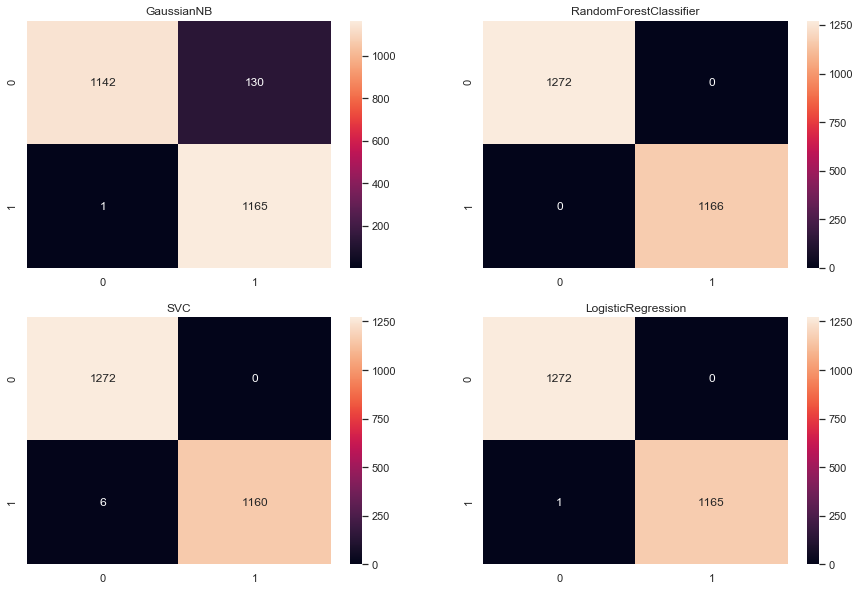

In [52]:
models_confusion_matrices.keys()
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()
for i, model in enumerate(models_confusion_matrices.keys()):
#     print(model)
    axes[i].set_title(model)
    sns.heatmap(models_confusion_matrices[model], ax=axes[i],  annot=True, fmt="d")

In [53]:
# tn, fp, fn, tp = models_confusion_matrices['RandomForestClassifier'].ravel()
# print(tn, fp, fn, tp)

False negatives:
- LogisticRegression: 1
- GaussianNB: 1
- RandomForestClassifier: 0
- SVC: 6

The 'RandomForestClassifier' classified all the data points correctly and it has no false negatives.

**According to the above information, the 'RandomForestClassifier' is chosen as the best model.**

## 7. Validation <a name="validation"></a>

As the chosen model scores 100% in the metrics, the hyper-parameter tuning will be a kind of exploration for the best parameters.

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [5, 10, 20, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 50, 100],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto' , None]
}

grid_obj = GridSearchCV(RF_model, param_grid=parameters, scoring='accuracy')
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_


In [59]:
# using the optimized model for prediction
best_predictions = best_clf.predict(X_test)

In [60]:
# default and optimized models accuracies
print("Random Forest Classifier Results:\n")
print("Unoptimized Model Testing Accuracy: {:.4f}\n".format(results['RandomForestClassifier']['acc_test']))
print("Optimized Model Testing Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))

Random Forest Classifier Results:

Unoptimized Model Testing Accuracy: 1.0000

Optimized Model Testing Accuracy: 1.0000


In [61]:
print("Best 'RandomForestClassifier' parameters values after tuning:")
display(pd.DataFrame(grid_obj.best_params_, index=['best parameters values']))

Best 'RandomForestClassifier' parameters values after tuning:


,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
best parameters values,gini,None,auto,1,2,5


The optimized model has the same accuracy as the default one (of course it can not beat it in our case :) ). Also, the optimized model has the same parameters after tuning except for 'n_estimators' which changed from 10 to 5. However, we can use the optimized model to find important features in our problem.

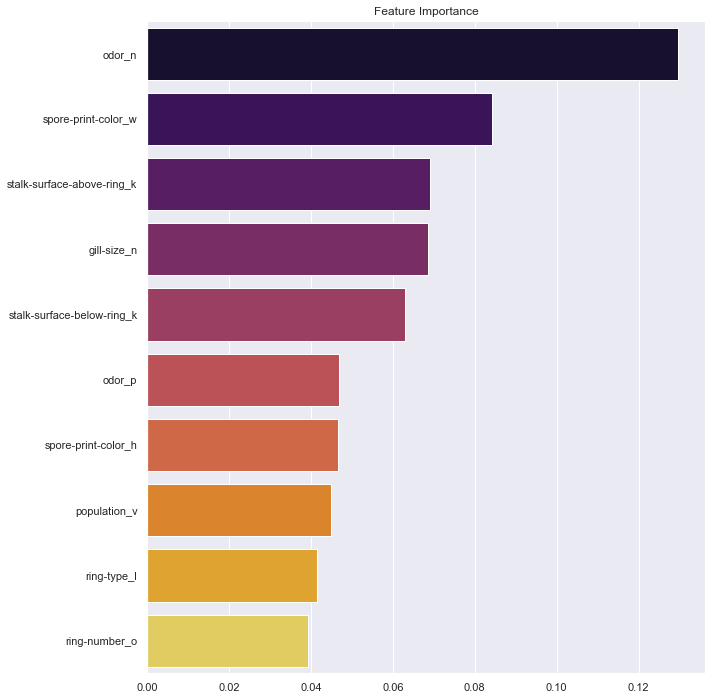

In [62]:
# plotting the most 10 important features in making the decision
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
imp = pd.Series(data=best_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]
ax = sns.barplot(y=imp.index, x=imp.values, palette="inferno", orient='h')

Some values from 'odor', 'spore-print-color', 'stalk-surface-above-ring', 'gill-size', 'stalk-surface-below-ring' 'population', 'ring-type', 'ring-number' where considered the most important factors in our classification. This is related to our observations about 'odor' and 'spore-print-color' found during examining the relationship between each column and the target variable in the 'Data Analysis' seciton. This is also a good indicator that our model is reliable.

## Conclusion

Our problem was about classifying mushrooms as poisonous or edible. The dataset used for this problem was obtained from 'UCI  Machine Leanring Repository'. It is a textual data with 23 columns and 8124 rows. All the columns contained categorical values, the 'class' column was our target variable. First: we started with data exploration to find the distribution of each column, and then we plotted every column against the target variable to see if we can predict the behavior of the model. Second: we preprocessed the data by using one-hot-encoding technique and removing unncessary columns. Third: We created the benchmark model (LogisticRegression), and built 3 other models (RandomForest, GaussianNaiveBayes, SVC) to make a comparison between all of them. LogisticRegression scored very well in terms of accuracy, but RandomForest was the best model becuase it didn't make any mistake during classification (100% training and testing accuracies and 0 false negatives). Finally, we implemented the hyper-paramet tuning technique to find the best parameters for our model, and to find the important features in our data. 